# Feature Engineering 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

In [2]:
train_csv = os.path.abspath(os.path.join(os.getcwd(), '..', 'data','train.csv'))
train = pd.read_csv(train_csv)
train = train.drop(['Name','Ticket','PassengerId'], axis=1)

## Missing Data

In [3]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Survived,0,0.000000


In [4]:
train = train.drop(['Cabin'], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
train.Age.fillna(train.groupby(['Sex','Pclass']).transform('median').Age, inplace=True)
train

/var/folders/29/6kwq30y57ss_d9k3j2zkgq2r0000gn/T/ipykernel_1546/122802364.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  train.Age.fillna(train.groupby(['Sex','Pclass']).transform('median').Age, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
train = train.dropna(axis=0)

In [7]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0


## Outliers

In [8]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

def flooring_and_capping(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 - (whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    return np.where(df[variable]>upper_whisker,upper_whisker,np.where(df[variable]<lower_whisker,lower_whisker,df[variable]))

In [10]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(train, "Age")
print("Probable: ",probable_outliers_tm)
print("Possible: ",possible_outliers_tm)


Probable:  [629]
Possible:  [11, 33, 54, 93, 95, 115, 169, 194, 231, 251, 267, 274, 279, 325, 365, 437, 455, 482, 486, 492, 544, 554, 569, 586, 624, 629, 658, 671, 683, 693, 744, 849]


In [12]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(train, "Fare")
print("Probable: ",probable_outliers_tm)
print("Possible: ",possible_outliers_tm)


Probable:  [27, 31, 87, 117, 194, 214, 257, 267, 268, 296, 298, 304, 305, 306, 310, 317, 318, 324, 331, 333, 336, 340, 372, 376, 379, 389, 392, 434, 437, 497, 504, 526, 536, 543, 549, 556, 580, 608, 658, 659, 678, 688, 697, 699, 707, 715, 729, 736, 741, 762, 778, 801, 854]
Possible:  [1, 27, 31, 34, 52, 61, 71, 87, 101, 117, 119, 123, 138, 150, 158, 179, 194, 200, 214, 217, 223, 229, 244, 255, 256, 257, 261, 267, 268, 274, 289, 290, 296, 298, 304, 305, 306, 309, 310, 317, 318, 323, 324, 331, 333, 335, 336, 340, 365, 368, 372, 374, 376, 379, 384, 389, 392, 411, 434, 437, 444, 452, 483, 485, 495, 497, 503, 504, 519, 526, 536, 539, 543, 549, 556, 557, 580, 584, 586, 590, 608, 626, 640, 644, 654, 658, 659, 664, 678, 680, 688, 697, 699, 707, 715, 729, 736, 740, 741, 744, 758, 762, 764, 778, 788, 791, 801, 819, 833, 844, 847, 854, 861, 877]


/var/folders/29/6kwq30y57ss_d9k3j2zkgq2r0000gn/T/ipykernel_1546/1560363704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare'] = flooring_and_capping(train, 'Fare')


<AxesSubplot:xlabel='Fare'>

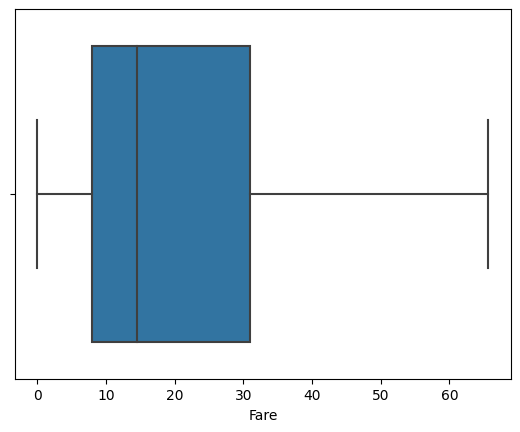

In [17]:
train['Fare'] = flooring_and_capping(train, 'Fare')
sb.boxplot(x='Fare', data=train)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

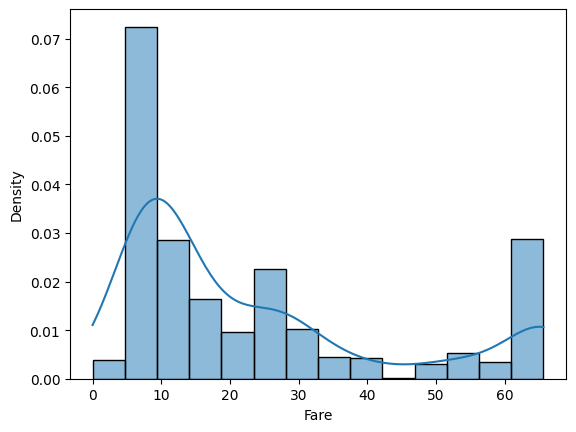

In [18]:
sb.histplot(data=train['Fare'], kde=True, stat='density')

/var/folders/29/6kwq30y57ss_d9k3j2zkgq2r0000gn/T/ipykernel_1546/3211691460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = flooring_and_capping(train, 'Age')


<AxesSubplot:xlabel='Age'>

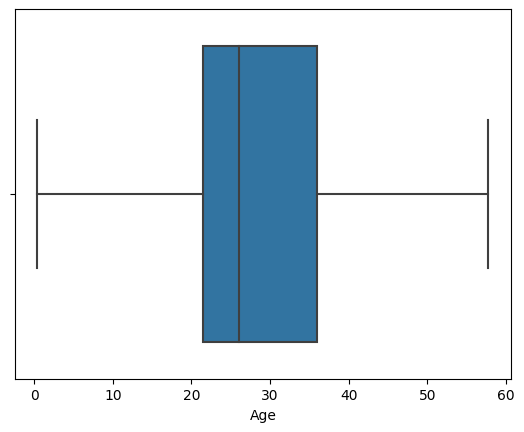

In [22]:
train['Age'] = flooring_and_capping(train, 'Age')
sb.boxplot(x='Age', data=train)

## Distribution Transformation

In [34]:
df = train.copy()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

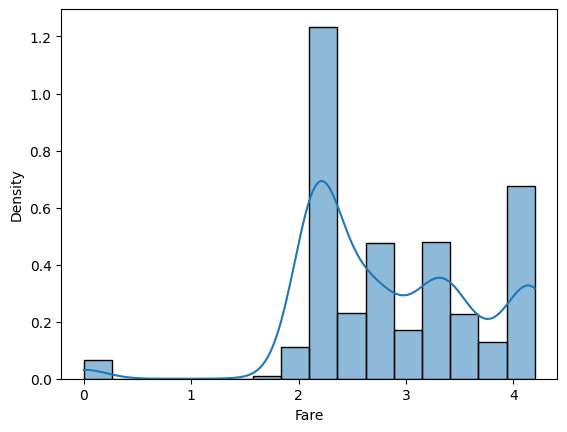

In [35]:
df['Fare'] = (df['Fare']+1).transform(np.log)
sb.histplot(data=df['Fare'], kde=True, stat='density')

## One-hot encoding

In [46]:
dummy_sex = pd.get_dummies(df['Sex'], prefix='Sex', prefix_sep='_',)

# Take a lookdummy.head()
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [47]:
dummy_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', prefix_sep='_',)

# Take a lookdummy.head()
dummy_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [55]:
df_new = df.join(dummy_sex)
df_new = df_new.join(dummy_embarked)
df_new.drop(['Sex','Embarked'],axis=1, inplace=True)
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2.110213,0,1,0,0,1
1,1,1,38.0,1,0,4.199550,1,0,1,0,0
2,1,3,26.0,0,0,2.188856,1,0,0,0,1
3,1,1,35.0,1,0,3.990834,1,0,0,0,1
4,0,3,35.0,0,0,2.202765,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,2.639057,0,1,0,0,1
887,1,1,19.0,0,0,3.433987,1,0,0,0,1
888,0,3,21.5,1,2,3.196630,1,0,0,0,1
889,1,1,26.0,0,0,3.433987,0,1,1,0,0


## Scaling

In [56]:
from sklearn import preprocessing

In [58]:
min_max_scaler = preprocessing.MinMaxScaler()
df_new[['Age','Fare']] = min_max_scaler.fit_transform(df_new[['Age','Fare']])

In [59]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.376417,1,0,0.502486,0,1,0,0,1
1,1,1,0.655503,1,0,1.000000,1,0,1,0,0
2,1,3,0.446189,0,0,0.521212,1,0,0,0,1
3,1,1,0.603175,1,0,0.950301,1,0,0,0,1
4,0,3,0.603175,0,0,0.524524,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.463632,0,0,0.628414,0,1,0,0,1
887,1,1,0.324089,0,0,0.817704,1,0,0,0,1
888,0,3,0.367696,1,2,0.761184,1,0,0,0,1
889,1,1,0.446189,0,0,0.817704,0,1,1,0,0


In [61]:
df_new.to_csv('../data/train_new.csv')